<a href="https://colab.research.google.com/github/Stholyst/Bechdel-Test/blob/master/myProjectIimplimentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Preprocessing


# New Section

In [4]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


Training LSTM Model...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.7229 - loss: 0.4878
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9934 - loss: 0.0263
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9996 - loss: 0.0038
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.9994 - loss: 0.0018
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9994 - loss: 0.0014
Training GRU Model...
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 83ms/step - accuracy: 0.7682 - loss: 0.4381
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9974 - loss: 0.0094
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.9994 - loss: 0.0015
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.9993 - loss: 0.0021
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.9998 - loss: 0.0040
Evaluating LSTM Model...
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8543 - loss: 0.5155
Evaluating GRU Mode

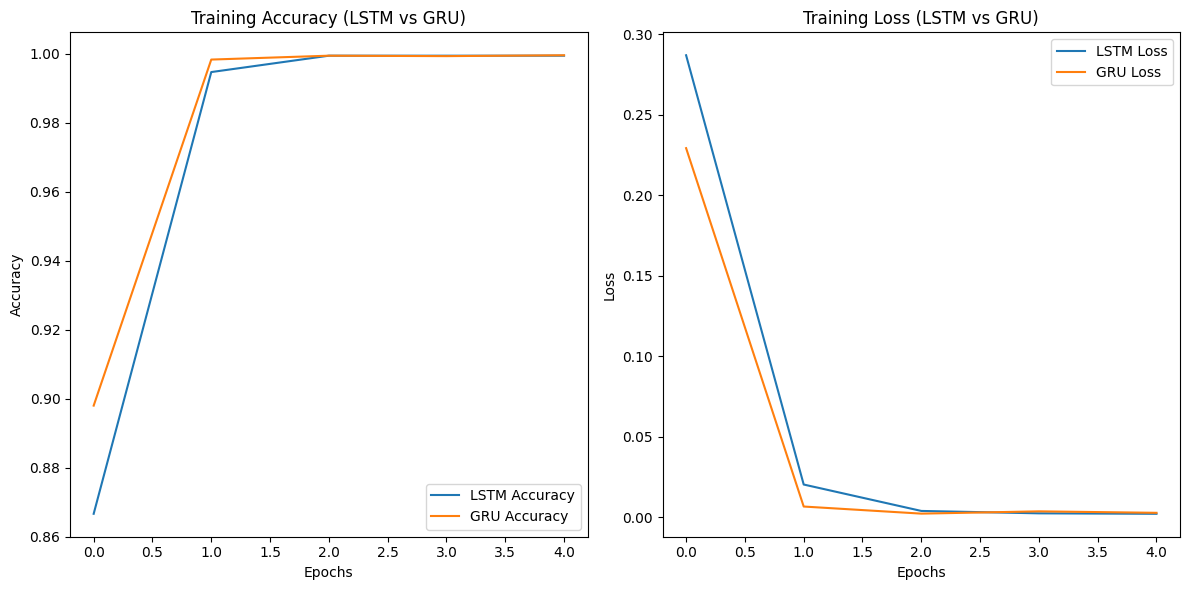

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense


# Ensure reproducibility by setting all random seeds
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)  # Set random seed for TensorFlow


# Load and preprocess the dataset
rnn_data = pd.read_csv('/content/5.urldata.csv')  # Replace with your RNN dataset path
rnn_texts = rnn_data['Domain'].values
rnn_labels = rnn_data['Label'].values

# Ensure labels are integers (binary classification requires 0/1 labels)
rnn_labels = rnn_labels.astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    rnn_texts, rnn_labels, test_size=0.2, random_state=42
)  # 80% train, 20% test split

# Tokenizer for RNN training
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data only

# Tokenize and pad sequences for training and testing
max_len = 100  # Length of sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

# Define LSTM Model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile LSTM Model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM Model and capture the history
print("Training LSTM Model...")
history_lstm = model_lstm.fit(X_train_padded, y_train, epochs=5, batch_size=32, verbose=1)

# Save the LSTM model
model_lstm.save('lstm_model.keras')

# Define GRU Model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model_gru.add(GRU(64))
model_gru.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile GRU Model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train GRU Model and capture the history
print("Training GRU Model...")
history_gru = model_gru.fit(X_train_padded, y_train, epochs=5, batch_size=32, verbose=1)

# Save the GRU model
model_gru.save('gru_model.keras')

# Evaluate models
print("Evaluating LSTM Model...")
lstm_eval = model_lstm.evaluate(X_test_padded, y_test, verbose=1)

print("Evaluating GRU Model...")
gru_eval = model_gru.evaluate(X_test_padded, y_test, verbose=1)

print(f"LSTM Test Accuracy: {lstm_eval[1]}")
print(f"GRU Test Accuracy: {gru_eval[1]}")


# Plotting the training results for LSTM and GRU
def plot_training_history(history_lstm, history_gru):
    # Plot accuracy over epochs
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history_lstm.history['accuracy'], label="LSTM Accuracy")
    plt.plot(history_gru.history['accuracy'], label="GRU Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy (LSTM vs GRU)")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history_lstm.history['loss'], label="LSTM Loss")
    plt.plot(history_gru.history['loss'], label="GRU Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss (LSTM vs GRU)")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Call function to plot training history
plot_training_history(history_lstm, history_gru)
